In [124]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib

from sklearn.neighbors.kde import KernelDensity

from astropy.time import Time
from astropy import units as u

matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

Compare the GCK and Galex data for lots of other stars...

In [4]:
# CDS X-Match between GCK and GALEX GR5

gck_gr5 = '1504810534436A.csv'
df = pd.read_csv(gck_gr5)
df.columns

Index([u'angDist', u'_RAJ2000', u'_DEJ2000', u'Pl', u'GCK', u'RAJ2000',
       u'DEJ2000', u'NUVmag', u'e_NUVmag', u'NUVsn', u'dRad', u'KIC', u'ra',
       u'dec', u'fuv_mag', u'nuv_mag', u'fuv_magerr', u'nuv_magerr', u'objid',
       u'E_bv', u'objtype', u'fuv_flux', u'fuv_fluxerr', u'nuv_flux',
       u'nuv_fluxerr', u'fuv_artifact', u'nuv_artifact'],
      dtype='object')

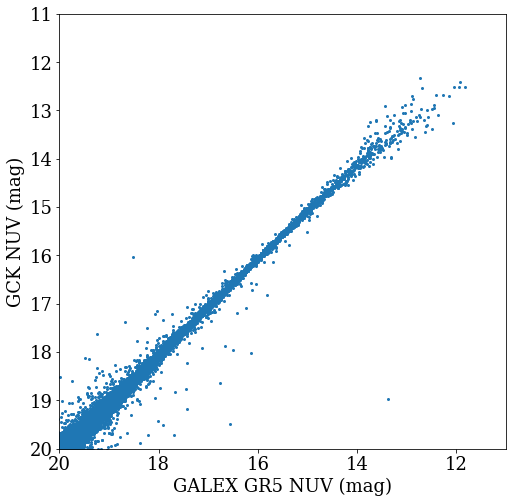

In [11]:
plt.figure(figsize=(8,8))
plt.scatter(df[u'nuv_mag'], df[u'NUVmag'], s=4)
plt.xlim(20,11)
plt.ylim(20,11)
plt.xlabel('GALEX GR5 NUV (mag)')
plt.ylabel('GCK NUV (mag)')

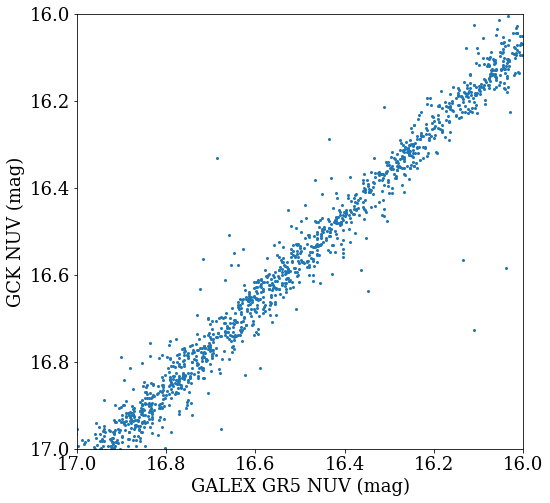

In [23]:
plt.figure(figsize=(8,8))
plt.scatter(df[u'nuv_mag'], df[u'NUVmag'], s=4)
plt.xlim(17,16)
plt.ylim(17,16)
plt.xlabel('GALEX GR5 NUV (mag)')
plt.ylabel('GCK NUV (mag)')

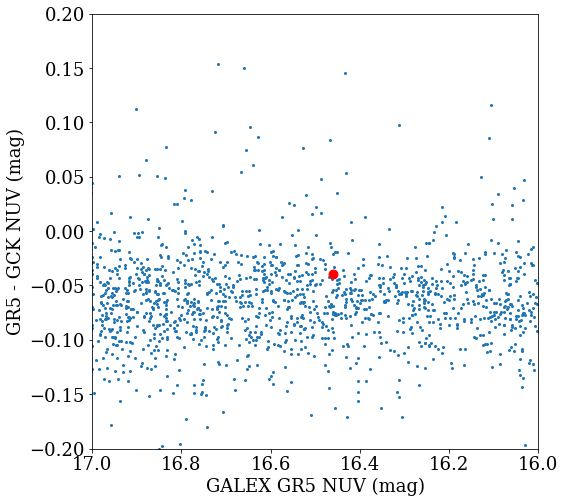

In [29]:
plt.figure(figsize=(8,8))
plt.scatter(df[u'nuv_mag'], df[u'nuv_mag'] - df[u'NUVmag'], s=4)
plt.scatter(16.46, 16.46 - 16.499, s=80, c='r')
plt.xlim(17,16)
plt.ylim(-.2,.2)
plt.xlabel('GALEX GR5 NUV (mag)')
plt.ylabel('GR5 - GCK NUV (mag)')

In [122]:
GCK_near = 'GCK_seach.txt'
GR6_near = 'galex_1846338921.csv'

gck = pd.read_table(GCK_near, delimiter='|', names=('ra', 'dec', 'pl','gck','ra2000','de2000','nuvmag','e_nuvmag',
                                                    'nuvflux','e_nuvflux', 'nuvsn', 'drad','KIC'), comment='#')
gr6 = pd.read_csv(GR6_near)

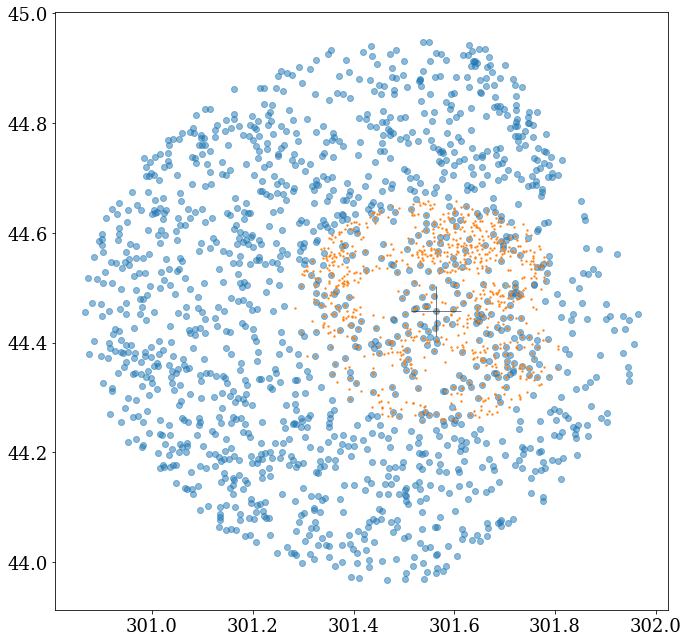

In [53]:
plt.figure(figsize=(11,11))
plt.scatter(gck['ra'], gck['dec'], alpha=0.5)
plt.scatter(gr6['ra'], gr6['dec'], alpha=0.85,s=2)
plt.plot(301.5644, 44.45684, '+', markersize=50, c='k', alpha=0.5)

In [74]:
# match the datasets within 1arcsecond

mtch = np.zeros(len(gr6['ra'])) - 1

dlim = 1. / 3600.

for k in range(len(gr6['ra'])):
    dist = np.sqrt((gck['ra'].values - gr6['ra'].values[k])**2 + 
                   (gck['dec'].values - gr6['dec'].values[k])**2)
    x = np.where((dist <= dlim))[0]
    
    if len(x) > 0:
        mtch[k] = x[0]


ok = np.where((mtch > -1))[0]

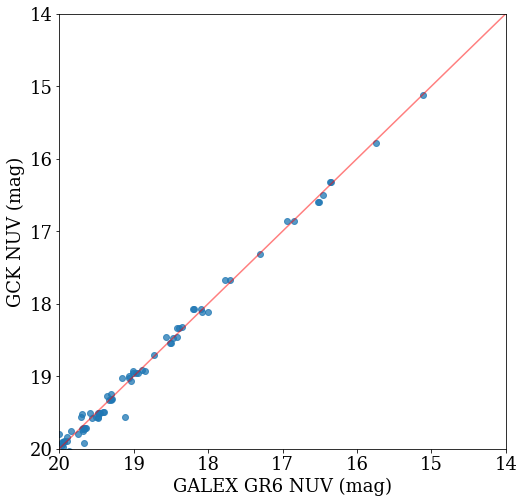

In [84]:
plt.figure(figsize=(8,8))
plt.scatter(gr6['nuv_mag'].values[ok], gck['nuvmag'][mtch[ok]], alpha=0.75)
plt.plot([20,14],[20,14], c='r', alpha=0.5)
plt.xlim(20,14)
plt.ylim(20,14)
plt.xlabel('GALEX GR6 NUV (mag)')
plt.ylabel('GCK NUV (mag)')

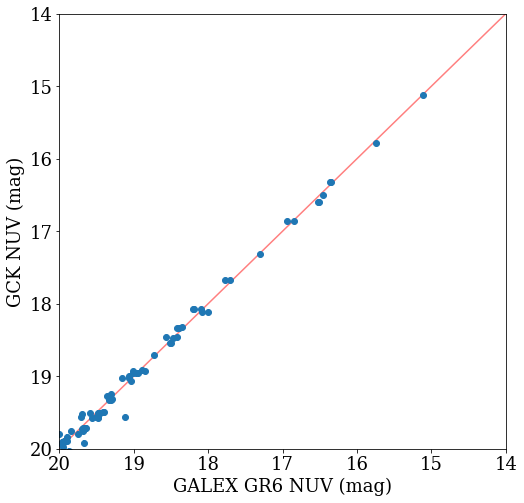

In [216]:
plt.figure(figsize=(8,8))
plt.errorbar(gr6['nuv_mag'].values[ok], gck['nuvmag'][mtch[ok]], yerr=gck['e_nuvmag'][mtch[ok]], 
             linestyle='none', marker='o')
plt.plot([20,14],[20,14], c='r', alpha=0.5)
plt.xlim(20,14)
plt.ylim(20,14)
plt.xlabel('GALEX GR6 NUV (mag)')
plt.ylabel('GCK NUV (mag)')
plt.savefig('GCK_GR6.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

In [117]:
print(gck['nuvmag'][mtch[ok]].values[0], gr6['nuv_mag'][ok][0])
print(gr6['nuv_mag'][ok][0] - gck['nuvmag'][mtch[ok]].values[0])

(16.499000000000002, 16.460850000000001)
-0.03815


(31,)


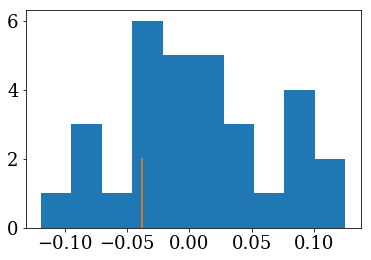

In [201]:
okc = np.where((mtch > -1) & (gr6['nuv_mag'] < 19))[0]

print(np.shape(okc))

_ = plt.hist(gr6['nuv_mag'].values[okc] - gck['nuvmag'][mtch[okc]])
plt.plot( (gr6['nuv_mag'][ok][0] - gck['nuvmag'][mtch[ok]].values[0]) * np.ones(2), [0,2])

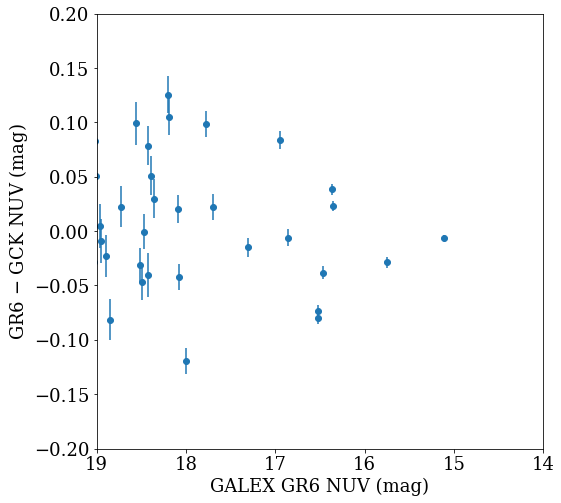

In [211]:
plt.figure(figsize=(8,8))
plt.errorbar(gr6['nuv_mag'].values[ok], gr6['nuv_mag'].values[ok] - gck['nuvmag'][mtch[ok]], 
             yerr=gck['e_nuvmag'][mtch[ok]], linestyle='none', marker='o')
plt.xlim(19,14.)
plt.ylim(-.2,.2)
plt.xlabel('GALEX GR6 NUV (mag)')
plt.ylabel('GR6 $-$ GCK NUV (mag)')

In [210]:
X = np.array(gr6['nuv_mag'].values[okc] - gck['nuvmag'][mtch[okc]].values)[:,None]

kde = KernelDensity(kernel='gaussian', bandwidth=np.mean(gck['e_nuvmag'][mtch[okc]]) * 2 ).fit(X)
kde

KernelDensity(algorithm='auto', atol=0, bandwidth=0.0254838709677,
       breadth_first=True, kernel='gaussian', leaf_size=40,
       metric='euclidean', metric_params=None, rtol=0)

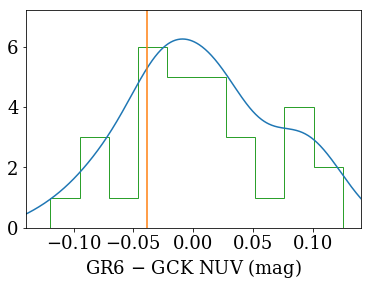

In [217]:
X_new = np.linspace(-.25,.25,1000)[:, None]
log_dens = np.exp(kde.score_samples(X_new))
plt.plot(X_new[:,0], log_dens)
plt.plot( (gr6['nuv_mag'][ok][0] - gck['nuvmag'][mtch[ok]].values[0]) * np.ones(2), [0,8])
_ = plt.hist(gr6['nuv_mag'].values[okc] - gck['nuvmag'][mtch[okc]], histtype='step')
plt.xlim(-0.14, 0.14)
plt.ylim(0,7.2)
plt.xlabel('GR6 $-$ GCK NUV (mag)')
plt.savefig('hist_diff.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

In [220]:
kde.score_samples(X)

array([ 1.6692204 ,  1.67315671,  1.49394832,  1.83279452,  1.80383286,
        1.67897793,  1.76001204,  1.73933927,  1.5510749 ,  1.82142066,
        0.90392906,  1.18908153,  1.33699593,  1.83191295,  1.21321777,
        1.79844385,  1.70220279,  0.93408817,  1.07601544,  1.68498259,
        1.09490883,  1.60151023,  1.01521768,  0.55254331,  1.64404685,
        1.09106778,  1.83138907,  1.17857938,  1.6227065 , -0.05473408,
        1.826314  ])